In [21]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [22]:
img_bgr = cv2.imread('lenna.jpg')
height, width, channel = img_bgr.shape

img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY) 

In [23]:
## Functions

def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure()
    
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        
        if current_type == "gray":
            current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color = "black")
            current_plot.set_xlim([0, 260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)            
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list,rotation = 90)

    plt.show()
    
    
def output_list(img, img_p):

    output_list = []

    output_list.append({
        "img": img,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "Original (gray)",
        "type": "gray"        
    })
    output_list.append({
        "img": img_p,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "Processed image",
        "type": "gray"
    })    
    
    hist = cv2.calcHist([img_p], [0], None, [256], [0, 256])
    
    output_list.append({
        "img": hist,
        "xlabel": "Bins",
        "ylabel": "Number of pixels",
        "xtick": None,
        "ytick": None,
        "title": "Histogram",
        "type": "histogram"
    })
    
    return output_list


def get_pixels(img, center, x, y, neighbours):

    pixels = [0] * len(neighbours)
    
    try:
        for i in range(len(pixels)):
            if neighbours[i] >= center:
                pixels[i] = 1 
    except:
        pass
    
    return pixels


def calculated_pixel(img, x, y, n):
    
    val_ar = get_pixels(img, img[x][y], x, y, n)
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
        
    return val

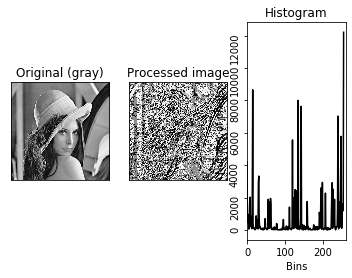

In [27]:
# LBP

img_lbp = np.zeros((height, width, 3), np.uint8)

for x in range(height-1):
    for y in range(width-1):
        
        n = [ img_gray[x-1][y+1], img_gray[x][y+1], img_gray[x+1][y+1], img_gray[x+1][y],
              img_gray[x+1][y-1], img_gray[x][y-1], img_gray[x-1][y-1], img_gray[x-1][y] ]
    
        img_lbp[x][y] = calculated_pixel(img_gray, x, y, n)
        
show_output(output_list(img_gray, img_lbp))

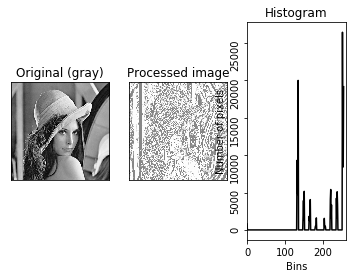

In [28]:
# LGS

img_lgs = np.zeros((height, width, 3), np.uint8)

for x in range(height-1):
    for y in range(width-1):
        
        n = [ img_gray[x-1][y-1], img_gray[x+1][y-1], img_gray[x][y], img_gray[x][y+1],
              img_gray[x-1][y+1], img_gray[x+1][y+1], img_gray[x][y+1], img_gray[x][y] ]
    
        img_lgs[x][y] = calculated_pixel(img_gray, x, y, n)
        
show_output(output_list(img_gray, img_lgs))

In [29]:
# ELGS
# histogramme donc pas vraiment besoin de code

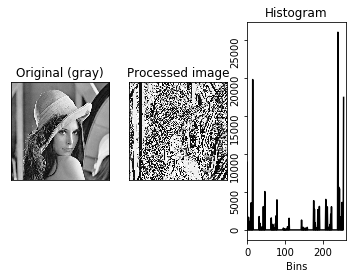

In [31]:
# SLGS

img_slgs = np.zeros((height, width, 3), np.uint8)

for x in range(height-1):
    for y in range(width-1):
        
        n = [ img_gray[x][y-1], img_gray[x-1][y-1], img_gray[x+1][y-1], img_gray[x][y-1],
              img_gray[x][y+1], img_gray[x-1][y+1], img_gray[x+1][y+1], img_gray[x][y+1] ]
    
        img_slgs[x][y] = calculated_pixel(img_gray, x, y, n)
                
show_output(output_list(img_gray, img_slgs))